In [33]:
# Tesseract OCR
from img2table.ocr import TesseractOCR

tesseract_ocr = TesseractOCR(n_threads=1, lang="eng")

In [ ]:
!pip install img2table

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.20.2
    Uninstalling polars-0.20.2:
      Successfully uninstalled polars-0.20.2


In [ ]:
from img2table.document import Image

In [ ]:
img = Image(src="/content/SBI_life_page-0014.jpg")

# Extract tables
extracted_tables = img.extract_tables()

/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_h_lines.columns})
/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/deduplication.py:21: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_cells.columns})


In [ ]:
extracted_tables

[ExtractedTable(title=None, bbox=(72, 73, 977, 539),shape=(8, 7)),
 ExtractedTable(title=None, bbox=(89, 646, 960, 964),shape=(11, 4)),
 ExtractedTable(title=None, bbox=(348, 580, 731, 627),shape=(4, 9))]

In [ ]:
# from PIL import Image
from PIL import Image as PILImage
import cv2

In [ ]:
src="/content/SBI_life_page-0014.jpg"

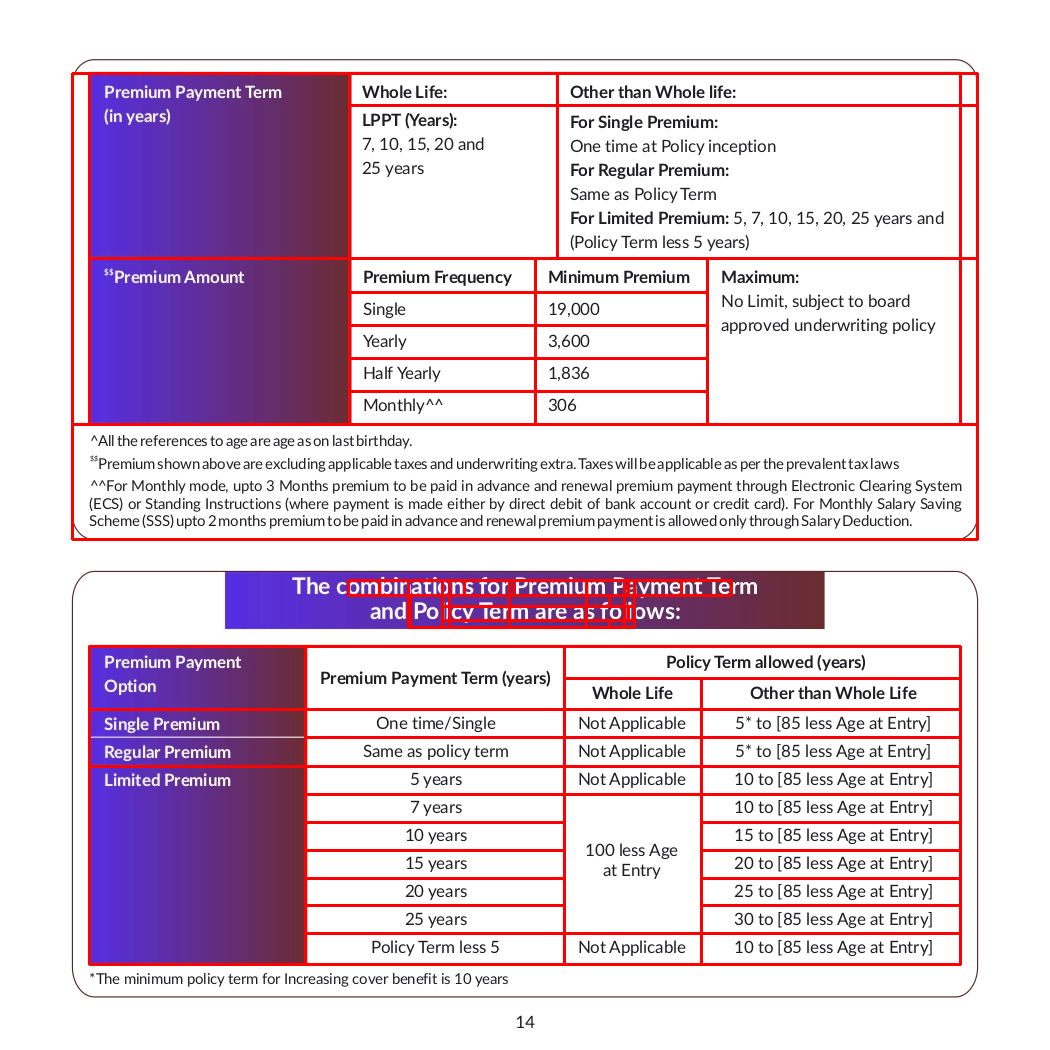

In [ ]:
# Display extracted tables
table_img = cv2.imread(src)

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 2)

PILImage.fromarray(table_img)

In [ ]:
from img2table.document import PDF

In [ ]:
# from img2table.document import PDF
# from img2table.ocr import TesseractOCR

# Instantiation of the pdf
pdf = PDF(src="/content/SBI_life.pdf")

# Instantiation of the OCR, Tesseract, which requires prior installation
ocr = TesseractOCR(lang="eng")

# Table identification and extraction
pdf_tables = pdf.extract_tables(ocr=ocr)

# We can also create an excel file with the tables
pdf.to_xlsx('tables1.xlsx',
            ocr=ocr)

/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_h_lines.columns})
/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/deduplication.py:21: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_cells.columns})
/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, whic

In [34]:
pdf = PDF(src="/content/table.pdf")

# Extract tables
extracted_tables = pdf.extract_tables(ocr=tesseract_ocr,
                                      implicit_rows=False,
                                      borderless_tables=False,
                                      min_confidence=50)

extracted_tables

/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_h_lines.columns})
/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/deduplication.py:21: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_cells.columns})


{0: [ExtractedTable(title=None, bbox=(235, 401, 1514, 958),shape=(6, 6))]}

In [ ]:
# # !apt install tesseract-ocr -y
# # !pip install pytesseract
# # !pip install img2table

# from img2table.document import PDF
# from img2table.ocr import TesseractOCR
# import cv2
# from PIL import Image

# # Initialize TesseractOCR with potentially more suitable language
# tesseract_ocr = TesseractOCR(n_threads=1, lang="eng")

# # Load PDF and extract tables
# pdf_path = "/content/SBI_life.pdf"
# pdf = PDF(src=pdf_path)

# # Extract tables with OCR and improved settings
# extracted_tables = pdf.extract_tables(ocr=tesseract_ocr,
#                                       implicit_rows=False,
#                                       borderless_tables=False,
#                                       min_confidence=50)

# # --- Image Preprocessing (example) ---
# def preprocess_image(image):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)[1]
#     return image

# # --- Iterate through pages and tables ---
# for page_num, tables in extracted_tables.items():
#     for table_num, table in enumerate(tables):
#         # --- Preprocess image before OCR ---
#         image = pdf.images[page_num]
#         processed_image = preprocess_image(image)

#         # --- Perform OCR on the preprocessed image ---
#         table = pdf.extract_table(processed_image,
#                                   ocr=tesseract_ocr,
#                                   implicit_rows=False,
#                                   borderless_tables=False,
#                                   min_confidence=50)

#         # Display or process the extracted table
#         print(f"Page {page_num + 1} - Table {table_num + 1}:")
#         display(table.df)

# # Export to Excel (optional)
# xlsx_path = "/content/tables.xlsx"
# pdf.to_xlsx(xlsx_path, ocr=tesseract_ocr)

/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_h_lines.columns})
/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/deduplication.py:21: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_cells.columns})


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
from IPython.display import display_html

In [35]:
for page, tables in extracted_tables.items():
    for idx, table in enumerate(tables):
        display_html(table.html_repr(title=f"Page {page + 1} - Extracted table n°{idx + 1}"), raw=True)

,0,1,2,3,4,5
0,Disability\nCategory,Participants,Ballots\nCompleted,Ballots\nIncomplete/\nTerminated,Results,Results
1,Disability\nCategory,Participants,Ballots\nCompleted,Ballots\nIncomplete/\nTerminated,Accuracy,Time to\ncomplete
2,Blind,5,1,4,"34.5%, n=1","1199 sec, n=1"
3,Low Vision,5,2,3,"98.3% n=2\n(97.7%, n=3)","1716 sec, n=3\n(1934 sec, n=2)"
4,Dexterity,5,4,1,"98.3%, n=4","1672.1 sec, n=4"
5,Mobility,3,3,0,"95.4%, n=3","1416 sec, n=3"


In [ ]:

# Initialize TesseractOCR
#tesseract_ocr = TesseractOCR(n_threads=1, lang="eng")
import pytesseract
from PIL import Image
# Function to preprocess images
def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply thresholding
    _, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

    # Apply some denoising
    image = cv2.fastNlMeansDenoising(image, h=30)

    # Save the preprocessed image
    preprocessed_image_path = "preprocessed_image.png"
    cv2.imwrite(preprocessed_image_path, image)

    return preprocessed_image_path

# Preprocess the image (example usage with the provided image path)
image_path = preprocess_image("/content/SBI_life_page-0014.jpg")

# Use Tesseract to extract text from the preprocessed image
text = pytesseract.image_to_string(Image.open(image_path), config="--psm 6")

print("Extracted Text:")
print(text)

#

Extracted Text:
Drm acu) Whole Life: Other than Whole life:
too) LPPT (Years): For Single Premium:
7, 10, 15, 20 and One time at Policy inception
25 years For Regular Premium:
Same as Policy Term
For Limited Premium: 5, 7, 10, 15, 20, 25 years and
(Policy Term less 5 years)
a Premium Frequency | Minimum Premium | Maximum
19,000 No Limit, subject to board
approved underwriting policy
Half Yearly 1,836
All the references to age are age ason last birthday.
Premium shown above are excluding applicable taxes and underwriting extra. Taxes will beapplicable as per the prevalent taxlaws
*AFor Monthly mode, upto 3 Months premium to be paid in advance and renewal premium payment through Electronic Clearing System
(ECS) or Standing Instructions (where payment is made either by direct debit of bank account or credit card). For Monthly Salary Saving
Scheme (SSS) upto 2months pretium tobe paid in advance and renewal premium paymentis allowed only through Salary Deduction.
MDa emer lew oma e eh ot ME

In [36]:
#Load PDF and extract tables
pdf_path = "/content/table.pdf"
pdf = PDF(src=pdf_path)

# Extract tables with OCR and improved settings
extracted_tables = pdf.extract_tables(ocr=tesseract_ocr,
                                      implicit_rows=False,
                                      borderless_tables=False,
                                      min_confidence=50)

# Display extracted tables
for idx, table in enumerate(extracted_tables):
    print(f"Table {idx + 1}:")
    print(table)

# Export to Excel
xlsx_path = "/content/tables3.xlsx"
pdf.to_xlsx(xlsx_path,
            ocr=tesseract_ocr,
            implicit_rows=False,
            borderless_tables=False,
            min_confidence=50)

print(f"PDF successfully converted to Excel and saved at: {xlsx_path}")


/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_h_lines.columns})
/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/deduplication.py:21: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_cells.columns})


Table 1:
0
PDF successfully converted to Excel and saved at: /content/tables3.xlsx


/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_h_lines.columns})
/usr/local/lib/python3.10/dist-packages/img2table/tables/processing/bordered_tables/cells/deduplication.py:21: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_cells.columns})


In [ ]:
!apt install tesseract-ocr -y # install tesseract
!pip install pytesseract # install the python wrapper for tesseract
# Tesseract OCR
from img2table.ocr import TesseractOCR

tesseract_ocr = TesseractOCR(n_threads=1, lang="eng")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,681 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-